<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/week9__MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mo hinh ANN,
them 1 lop cho Dense la dau vao va kich thuoc tinh hieu vao

In [ ]:
model = Sequential()
model.add(Dense())

In [2]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


so nay la:  5


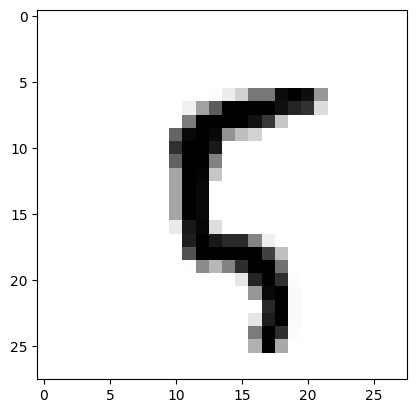

In [4]:
import matplotlib.pyplot as plt
hinh = train_images[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print("so nay la: ", train_labels[100])

<ipython-input-5-8c46ce967b04>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


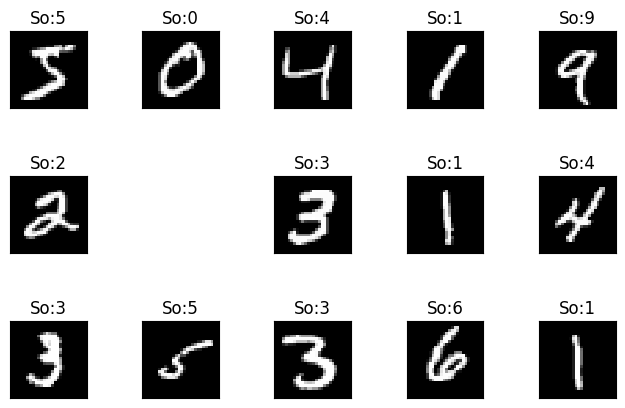

In [5]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray',interpolation = 'none')
  plt.title('So:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [7]:
from keras.engine.sequential import Sequential
from keras import models
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation='relu', input_shape=(28*28,), name = 'lop_1'))
model.add(Dense(10,activation = 'softmax', name = 'lop_m'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lop_1 (Dense)               (None, 512)               401920    
                                                                 
 lop_m (Dense)               (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255
from keras.utils import to_categorical # one hot enread.ry
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)


In [9]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Do chinh xac tren tap kiem tra: ',test_acc)
print('Ham mat mat tren tap kiem tra: ',test_loss)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.2634 - accuracy: 0.9228
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1067 - accuracy: 0.9678
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0695 - accuracy: 0.9799
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9850
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0374 - accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0278 - accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0219 - accuracy: 0.9942
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0162 - accuracy: 0.9956
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0122 - accuracy: 0.9969
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.

In [10]:
model.save('model1.h5')

In [11]:
from keras.saving.legacy.save import load_model
model11 = load_model('model1.h5')
model11.predict()

TypeError: ignored

<function matplotlib.pyplot.show(close=None, block=None)>

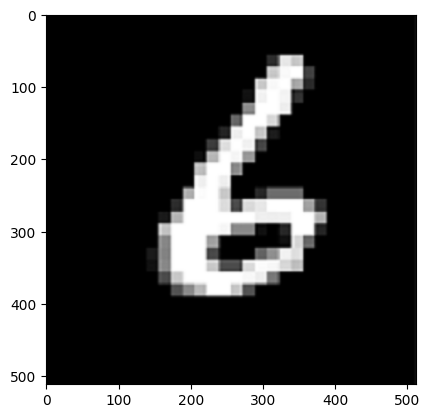

In [12]:
from keras.utils import load_img
img = load_img('RdEpj.jpg')
plt.imshow(img, cmap = plt.cm.binary)
plt.show


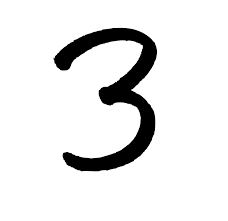

1/1 [==============================] - 0s 29ms/step
Predicted digit: 3


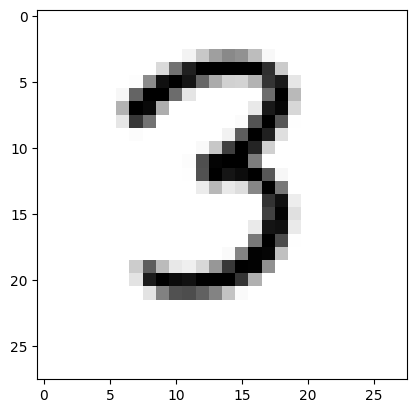

In [23]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import numpy as np
from PIL import Image
from keras.models import load_model
from IPython.display import display
url = load_model('model1.h5')
img = Image.open('three.jpg')
display(img)
img = img.convert('L')
img = img.resize((28,28))
plt.imshow(img, cmap = 'gray',interpolation= 'none')
img = np.array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255
predictions = model.predict(img)
digit = np.argmax(predictions)
print('Predicted digit:', digit)